<a href="https://colab.research.google.com/github/aprocking158/Data-Analysis/blob/main/Global_terrorism_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Global Terrorism**

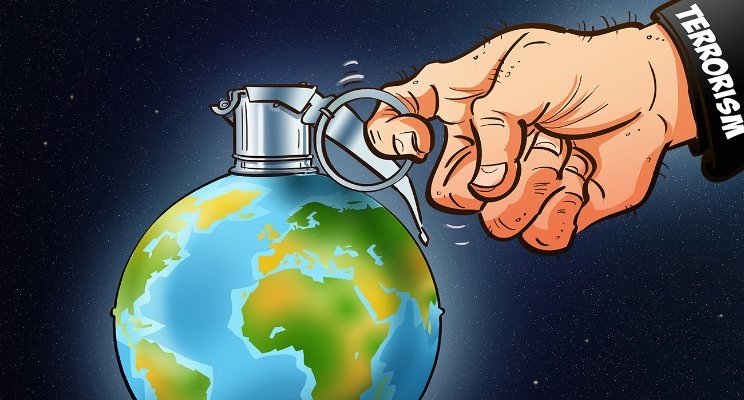

# *Title: Understanding Global Terrorism: A Comprehensive Analysis using the Global Terrorism Database*

## **Project Summary -**

Overview:

The dataset spans from 1970 to [latest year].
It contains information on terrorist incidents worldwide.
Key Statistics:

Total number of recorded incidents: [total count of rows].
Timeframe: [start year] to [end year].
Top Countries Affected:

The countries with the highest number of incidents are [list top countries].
Incident Characteristics:

Most common types of incidents include [mention types, e.g., bombings, assassinations].
Distribution of incidents across years and months.
Casualties:

Total number of casualties: [sum of casualties].
Average casualties per incident: [calculate average].
Motivations and Targets:

Explore the motivations behind incidents (if available).
Common targets: [mention common targets, e.g., civilians, government officials].
Geographical Distribution:

Regions most affected: [list regions].
Visualize incidents on a global map (if possible).
Trends Over Time:

Identify trends or patterns in terrorist activities over the years.
Data Quality:

Assess the completeness and reliability of the dataset.
Conclusion:

Summarize the overall impact and trends observed in global terrorism.
Remember to replace placeholders such as [latest year], [start year], [end year], etc., with the actual values from your dataset. If there are specific columns providing information on casualties, motivations, or targets, you may want to include those details in the summary.

# **Git Hub Link**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/Global Terrorism Data.csv', encoding='latin-1')

<ipython-input-3-52b10647b159>:1: DtypeWarning: Columns (4,31,33,61,62,76,79,90,92,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Global Terrorism Data.csv', encoding='latin-1')


# Removing unwanted column



In [ ]:
df. head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
 df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    67517
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       60538
Length: 135, dtype: int64

In [ ]:
df.count()

eventid       67548
iyear         67548
imonth        67548
iday          67548
approxdate       31
              ...  
INT_LOG       67547
INT_IDEO      67547
INT_MISC      67547
INT_ANY       67547
related        7010
Length: 135, dtype: int64

In [ ]:
# Finding columns having too many Null values
x = df.count()
columns_to_drop= x[x<1658].index
# Droping the columns()
new_df = df.drop(columns=columns_to_drop )


In [ ]:
new_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'gname', 'gsubname', 'guncertain1',
       'individual', 'nperps', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2',
       'weapsubtype2_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid',
       'nhostkidus', 'kidhijcountry', 'ransom', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'relate

In [ ]:
  #Droping rows which are not usefull
df1 = new_df.drop(columns=['eventid','country','extended','region','specificity','vicinity','crit1', 'crit2','crit3', 'doubtterr', 'multiple', 'suicide', 'attacktype1', 'targtype1','guncertain1', 'individual','weaptype1','dbsource', 'INT_LOG','INT_IDEO', 'INT_MISC', 'INT_ANY','property'], )


In [ ]:
 df1. head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,alternative,...,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,kidhijcountry,ransom,related
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,0.0,Mexico,1.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             67548 non-null  int64  
 1   imonth            67548 non-null  int64  
 2   iday              67548 non-null  int64  
 3   country_txt       67548 non-null  object 
 4   region_txt        67548 non-null  object 
 5   provstate         67137 non-null  object 
 6   city              67548 non-null  object 
 7   latitude          63925 non-null  float64
 8   longitude         63924 non-null  float64
 9   alternative       10538 non-null  float64
 10  alternative_txt   10538 non-null  object 
 11  success           67548 non-null  int64  
 12  attacktype1_txt   67548 non-null  object 
 13  targtype1_txt     67548 non-null  object 
 14  targsubtype1      64208 non-null  float64
 15  targsubtype1_txt  64208 non-null  object 
 16  corp1             35351 non-null  object

In [ ]:
df1= df1.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'state','attacktype1_txt':'attacktype','targtype1_txt':'target type','natlty1_txt':'nationality','gname':'Terror group','weaptype1_txt':'weapon type','nkill':'kills','nwound':'wounded' })
df1.head()

,year,month,day,country,region,state,city,latitude,longitude,alternative,...,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,kidhijcountry,ransom,related
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,0.0,Mexico,1.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN


In [ ]:
df1.isnull().sum()

year                    0
month                   0
day                     0
country                 0
region                  0
state                 411
city                    0
latitude             3623
longitude            3624
alternative         57010
alternative_txt     57010
success                 0
attacktype              0
target type             0
targsubtype1         3340
targsubtype1_txt     3340
corp1               32197
target1               464
natlty1               433
nationality           433
Terror group            0
gsubname            64833
nperps              57985
weapon type             0
weapsubtype1        11677
weapsubtype1_txt    11677
weaptype2           64111
weaptype2_txt       64111
weapsubtype2        64683
weapsubtype2_txt    64683
weapdetail           7368
kills                6044
nkillus             64084
nkillter            64290
wounded              8094
nwoundus            64131
nwoundte            64652
propextent          50305
propextent_t

In [ ]:
df1.columns

Index(['year', 'month', 'day', 'country', 'region', 'state', 'city',
       'latitude', 'longitude', 'alternative', 'alternative_txt', 'success',
       'attacktype', 'target type', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'nationality', 'Terror group',
       'gsubname', 'nperps', 'weapon type', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weapdetail', 'kills', 'nkillus', 'nkillter', 'wounded', 'nwoundus',
       'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment',
       'ishostkid', 'nhostkid', 'nhostkidus', 'kidhijcountry', 'ransom',
       'related'],
      dtype='object')

In [ ]:
df.shape

(67548, 135)

In [ ]:
df.describe

<bound method NDFrame.describe of             eventid  iyear  imonth  iday approxdate  extended resolution  \
0      197000000001   1970       7     2        NaN         0        NaN   
1      197000000002   1970       0     0        NaN         0        NaN   
2      197001000001   1970       1     0        NaN         0        NaN   
3      197001000002   1970       1     0        NaN         0        NaN   
4      197001000003   1970       1     0        NaN         0        NaN   
...             ...    ...     ...   ...        ...       ...        ...   
67543  199801150001   1998       1    15        NaN         0        NaN   
67544  199801170001   1998       1    17        NaN         0        NaN   
67545  199801170002   1998       1    17        NaN         0        NaN   
67546  199801170003   1998       1    17        NaN         0        NaN   
67547  199801170004   1998       1    17        NaN         0        NaN   

       country         country_txt  region  ...  \
0           58  Dominican Republic       2  ...   
1          130              Mexico       1  ...   
2          160         Philippines       5  ...   
3           78              Greece       8  ...   
4          101               Japan       4  ...   
...        ...                 ...     ...  ...   
67543      167              Russia       9  ...   
67544       34             Burundi      11  ...   
67545       32            Bulgaria       9  ...   
67546       78              Greece       8  ...   
67547        6             Algeria      10  ...   

                                                addnotes  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
67543  Another attack occurred the same day targeting...   
67544  The assailants first attacked the military out...   
67545                                                NaN   
67546                                                NaN   
67547                                                NaN   

                                                  scite1  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
67543  Bomb Explodes Outside Dagestani Capital's Tow...   
67544  Burundi  Army Spokesman Gives Details of Rum...   
67545  Newspaper offices target of bomb attack, BBC...   
67546  Greek terrorist group claims responsibility f...   
67547                                                NaN   

                                                  scite2  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
67543  Reasons Behind Latest Makhachkala Explosion P...   
67544  Burundi--'Fierce Attack' in Southwest Leaves ...   
67545  Bulgarian Newspaper Target of Bomb Attack, B...   
67546                                                NaN   
67547                                                NaN   

                                                  scite3  dbsource  INT_LOG  \
0                                                    NaN      PGIS      0.0   
1                                                    NaN      PGIS      0.0   
2                                       

# **people killed per year**

In [ ]:
people_killed_per_year = df1.groupby('year')['kills'].sum()

print(people_killed_per_year)




year
1970      174.0
1971      173.0
1972      566.0
1973      370.0
1974      539.0
1975      617.0
1976      674.0
1977      456.0
1978     1459.0
1979     2100.0
1980     4400.0
1981     4851.0
1982     5136.0
1983     9444.0
1984    10450.0
1985     7094.0
1986     4976.0
1987     6482.0
1988     7208.0
1989     8152.0
1990     7148.0
1991     8429.0
1992     9742.0
1994     7690.0
1995     6103.0
1996     6966.0
1997    10924.0
1998      480.0
Name: kills, dtype: float64


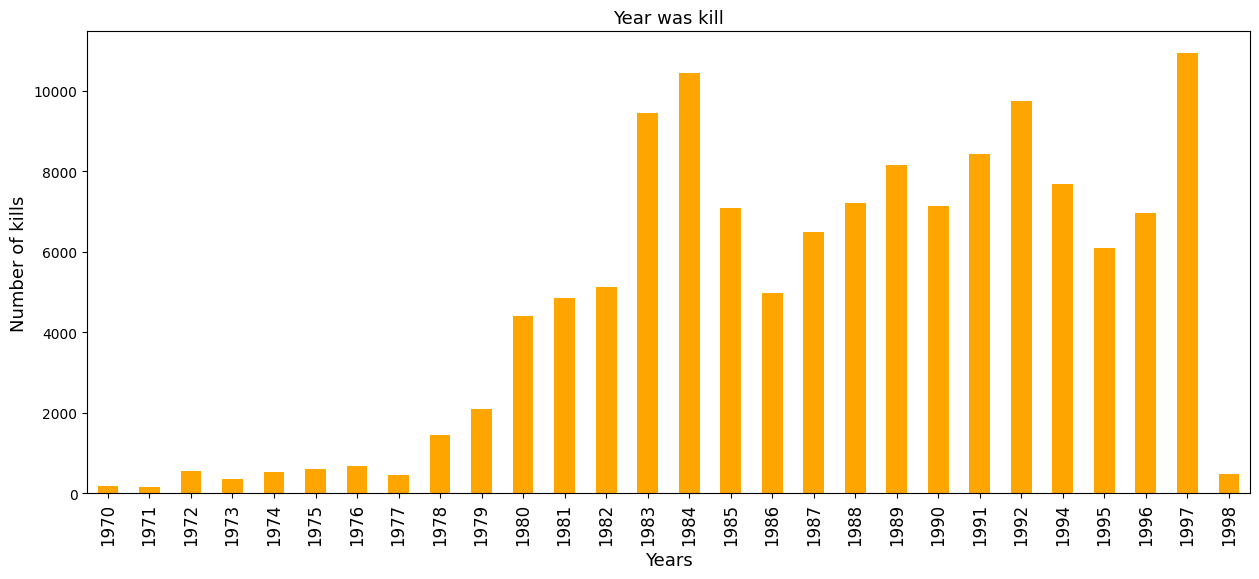

In [ ]:
people_killed_per_year.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Year was kill",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of kills",fontsize=13)
plt.show()

# **Number of Terrorist Activities each Year**














In [ ]:
Terrorist_attack_each_year = df1.groupby('year').size().reset_index(name='count')
print(Terrorist_attack_each_year)




    year  count
0   1970    651
1   1971    471
2   1972    568
3   1973    473
4   1974    581
5   1975    740
6   1976    923
7   1977   1319
8   1978   1526
9   1979   2662
10  1980   2662
11  1981   2586
12  1982   2544
13  1983   2870
14  1984   3495
15  1985   2915
16  1986   2860
17  1987   3183
18  1988   3721
19  1989   4324
20  1990   3887
21  1991   4683
22  1992   5071
23  1994   3456
24  1995   3081
25  1996   3058
26  1997   3197
27  1998     41


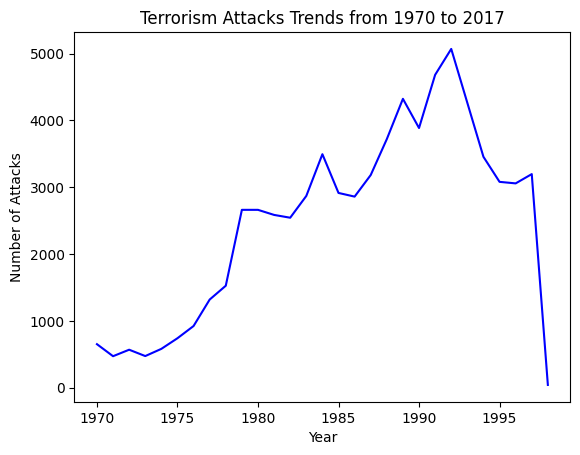

In [ ]:
sns.lineplot(x='year', y='count', data=Terrorist_attack_each_year, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()


# Top Countries affected by Terror Attacks

In [ ]:
Terrorist_attack_each_country = df1.groupby('country')['kills'].sum()
print(Terrorist_attack_each_country)


country
Afghanistan     382.0
Albania          35.0
Algeria        6227.0
Andorra           0.0
Angola         1373.0
                ...  
Yemen            53.0
Yugoslavia       35.0
Zaire           324.0
Zambia           69.0
Zimbabwe        136.0
Name: kills, Length: 193, dtype: float64


In [ ]:
Terrorist_attack_each_country.head()

country
Afghanistan     382.0
Albania          35.0
Algeria        6227.0
Andorra           0.0
Angola         1373.0
Name: kills, dtype: float64

<ipython-input-80-627a7f00f536>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')


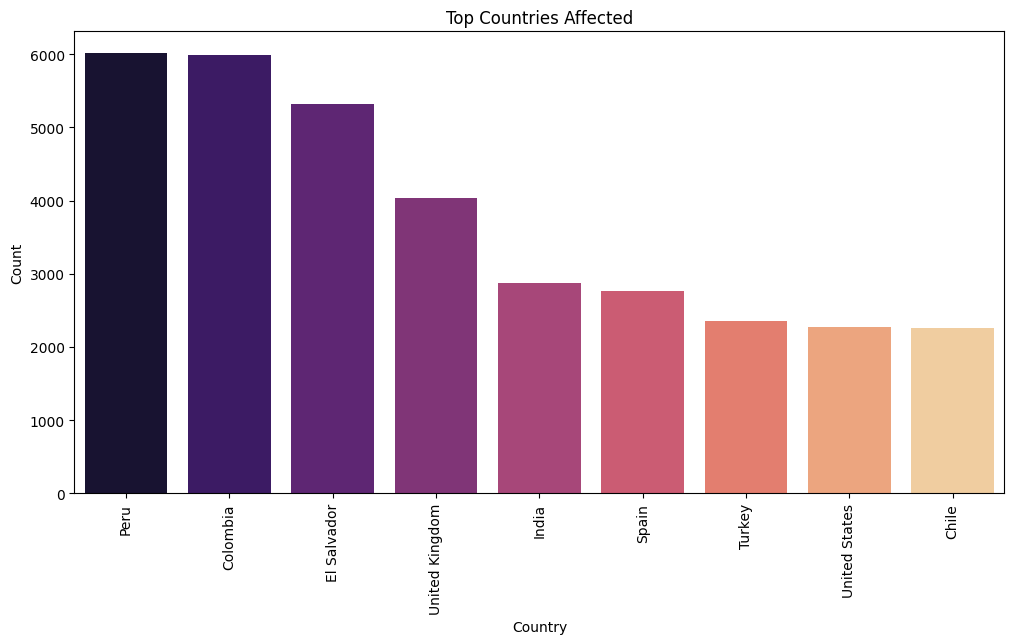

In [ ]:
plt.subplots(figsize=(12,6))
top=df1['country'].value_counts()[:9].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **Success rate of terrorist attacks**

In [ ]:
noa = df1.groupby('year').size().reset_index(name='count')
noa

,year,count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


In [ ]:
sum_of_attacks = noa['count'].sum()
print('Total number of attacks all over the world:', sum_of_attacks)

Total number of attacks all over the world: 67548


In [ ]:
succ = df1.groupby(['success']).size().reset_index(name='count')
succ['percentage'] =  succ['count']/sum_of_attacks *100
succ

,success,count,percentage
0,0,5660,8.379227
1,1,61888,91.620773


Text(0.5, 0, 'Outcome')

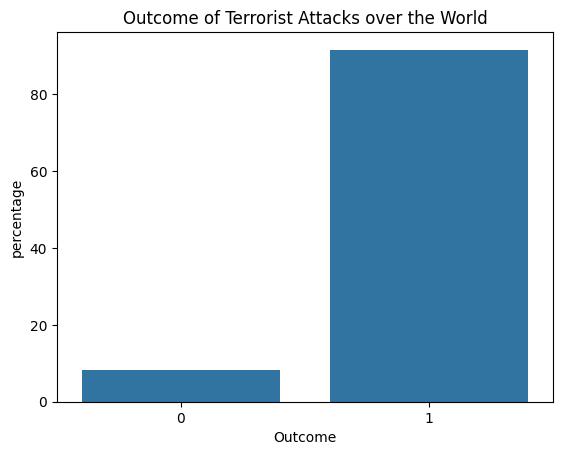

In [ ]:
sns.barplot(x = 'success', y = 'percentage', data=succ)
plt.title("Outcome of Terrorist Attacks over the World")
plt.xlabel("Outcome")

# **Terrorist Attacks in India**

In [ ]:
Southeast_Asia = df1[df1['country'] == 'India']
Southeast_Asia.head(5).head(5)

,year,month,day,country,region,state,city,latitude,longitude,alternative,...,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,kidhijcountry,ransom,related
1186,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,...,NaN,NaN,NaN,NaN,1.0,187.0,0.0,Yemen,1.0,NaN
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3857,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,NaN,...,NaN,NaN,NaN,NaN,1.0,146.0,9.0,Algeria,1.0,NaN
7337,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,NaN,...,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN


In [ ]:
Southeast_Asia_attacks = Southeast_Asia['year'].count()
print('There were',Southeast_Asia_attacks ,'attacks in india.')

There were 2870 attacks in india.


In [ ]:
Southeast_Asia_success = Southeast_Asia.groupby('success').size().reset_index(name='count')
Southeast_Asia_success['percentage'] = Southeast_Asia_success['count'] / Southeast_Asia_attacks * 100
Southeast_Asia_success

,success,count,percentage
0,0,194,6.759582
1,1,2676,93.240418


In [ ]:
print(Southeast_Asia_success.head())
print(df1.head())

   success  count  percentage
0        0    194    6.759582
1        1   2676   93.240418
   year  month  day             country                       region    state  \
0  1970      7    2  Dominican Republic  Central America & Caribbean      NaN   
1  1970      0    0              Mexico                North America  Federal   
2  1970      1    0         Philippines               Southeast Asia   Tarlac   
3  1970      1    0              Greece               Western Europe   Attica   
4  1970      1    0               Japan                    East Asia  Fukouka   

            city   latitude   longitude  alternative  ... propextent  \
0  Santo Domingo  18.456792  -69.951164          NaN  ...        NaN   
1    Mexico city  19.371887  -99.086624          NaN  ...        NaN   
2        Unknown  15.478598  120.599741          NaN  ...        NaN   
3         Athens  37.997490   23.762728          NaN  ...        NaN   
4        Fukouka  33.580412  130.396361          NaN  ...      

Text(0.5, 0, 'Outcome')

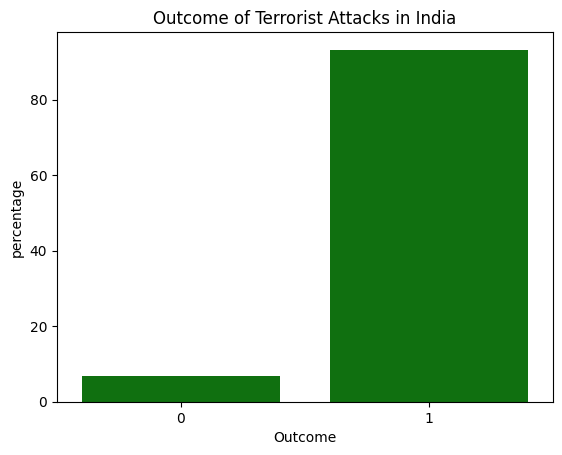

In [ ]:
sns.barplot(x='success', y='percentage', data=Southeast_Asia_success, color='green')
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")

# **Attack types in India and their success rates**

In [ ]:
attack_type_India = Southeast_Asia_success.groupby(['attacktype','success']).size().reset_index(name='count')
attack_type_India

,index,count
0,attacktype,1
1,success,1


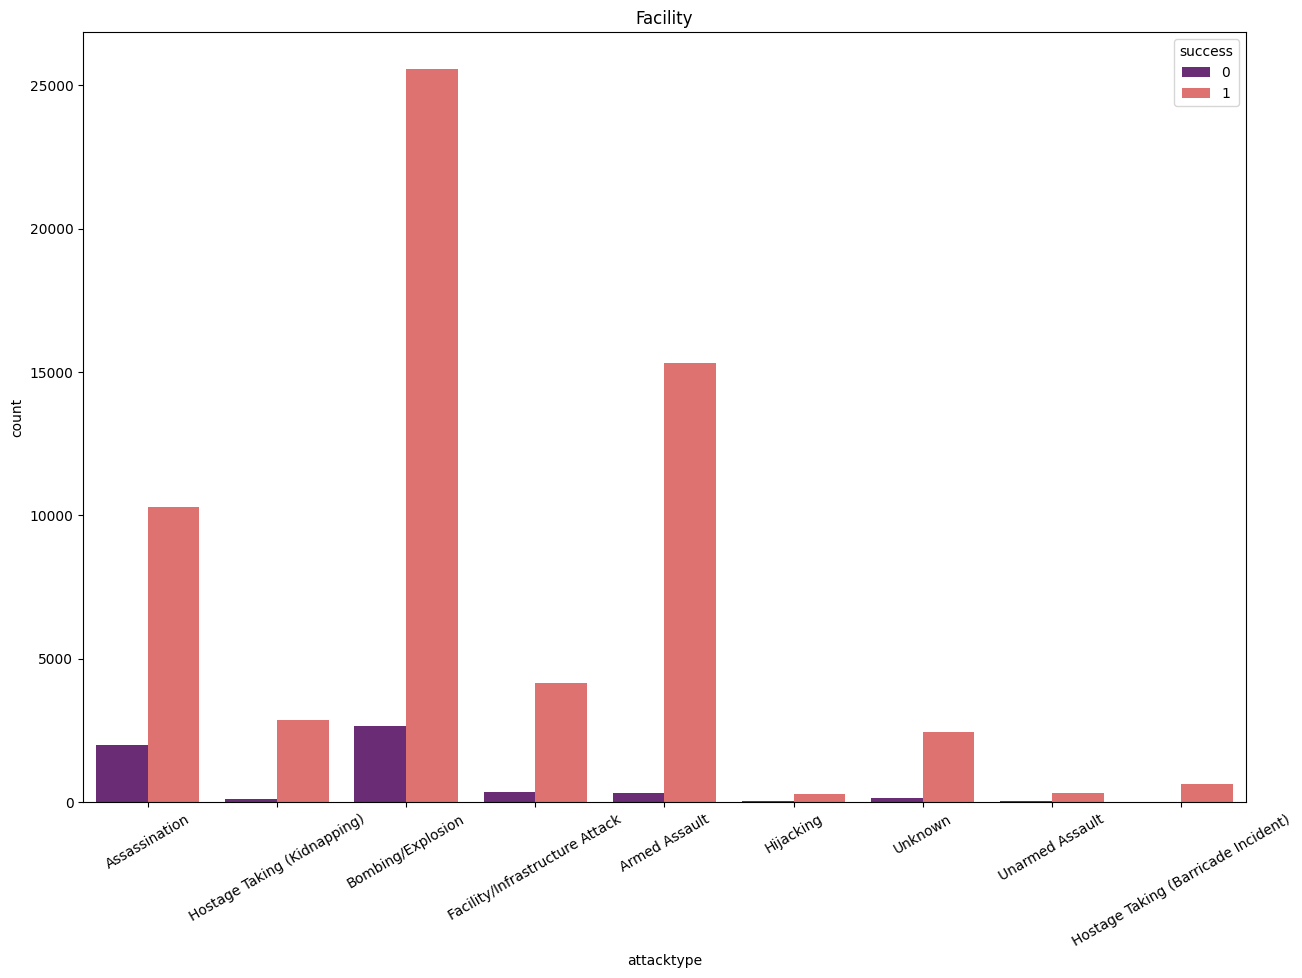

In [ ]:
# Assuming 'attacktype' is the column you want to count
plt.figure(figsize=(15, 10))
sns.countplot(x='attacktype', hue='success', data=df1, palette='magma')
plt.xticks(rotation=30)
plt.title("Facility")
plt.show()


In [ ]:
df1.columns

Index(['year', 'month', 'day', 'country', 'region', 'state', 'city',
       'latitude', 'longitude', 'alternative', 'alternative_txt', 'success',
       'attacktype', 'target type', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'nationality', 'Terror group',
       'gsubname', 'nperps', 'weapon type', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weapdetail', 'kills', 'nkillus', 'nkillter', 'wounded', 'nwoundus',
       'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment',
       'ishostkid', 'nhostkid', 'nhostkidus', 'kidhijcountry', 'ransom',
       'related'],
      dtype='object')

# **Types of terrorist attacks that cause deaths**

In [ ]:
df1.columns

Index(['year', 'month', 'day', 'country', 'region', 'state', 'city',
       'latitude', 'longitude', 'alternative', 'alternative_txt', 'success',
       'attacktype', 'target type', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'nationality', 'Terror group',
       'gsubname', 'nperps', 'weapon type', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weapdetail', 'kills', 'nkillus', 'nkillter', 'wounded', 'nwoundus',
       'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment',
       'ishostkid', 'nhostkid', 'nhostkidus', 'kidhijcountry', 'ransom',
       'related'],
      dtype='object')

In [ ]:
# Change 'Kills' to the correct column name
kills = pd.to_numeric(df1['kills'], errors='coerce')
print('Number of people killed by terror attack:', int(sum(kills.dropna())))


Number of people killed by terror attack: 132803


In [ ]:
attackData = df1.loc[:,'attacktype']
typeKillData = pd.concat([attackData, kills], axis=1)

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype', values='kills', aggfunc='sum')
typeKillFormatData

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kills,73957.0,16127.0,27172.0,1454.0,464.0,967.0,1864.0,232.0,10566.0


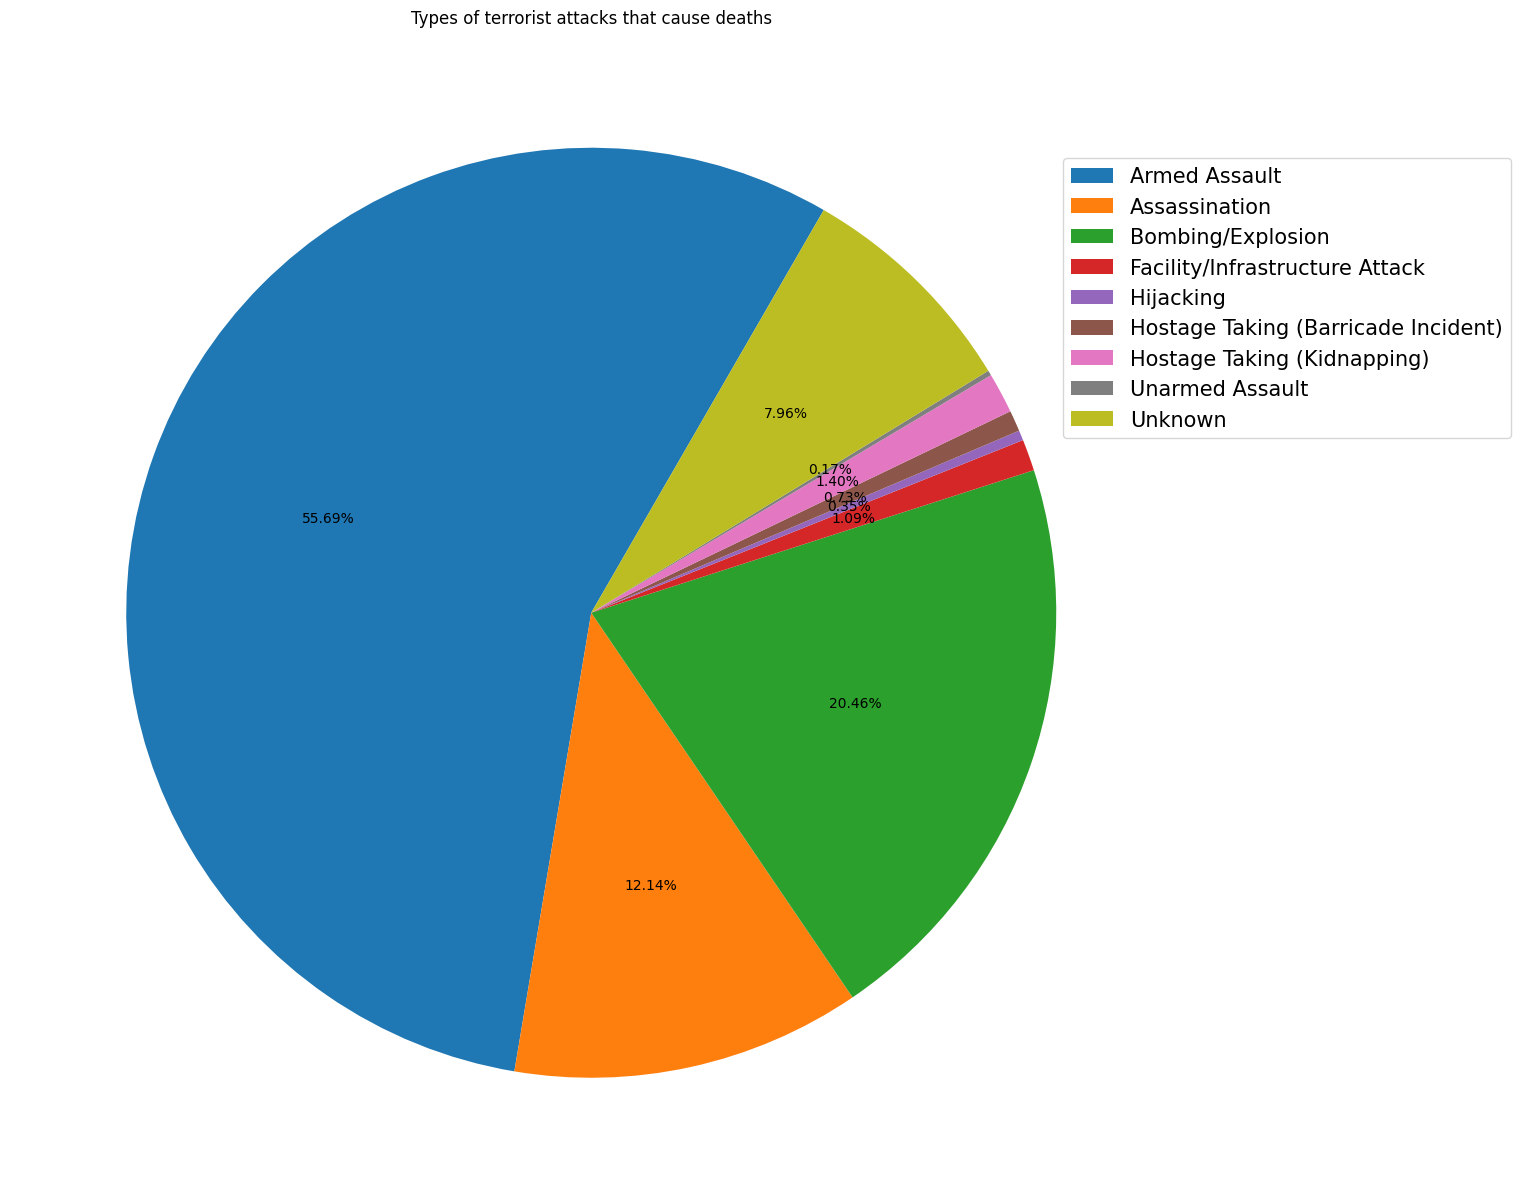

In [ ]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(15, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=60, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()

# Taliban is the most active terrorist group around the world.


In [ ]:
import plotly.express as px

# Continue with your code
country_counts = df1['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts, locations='Country', locationmode='country names', color='Attack Count',
                        title='Terrorist Attacks by Country',
                        labels={'Attack Count': 'Number of Attacks'},
                        hover_name='Country', color_continuous_scale='Blues')

fig.show()

# **Conclusion**

The global landscape is witnessing a concerning rise in the incidence of terrorism attacks, posing a growing threat to peace and security. This unsettling trend is particularly pronounced in two regions: the Middle East and North Africa, as well as South America, where the number of terrorist attacks has surged significantly.

One of the striking aspects of this worrisome phenomenon is the high rate of success achieved by terrorist groups and individuals. Alarmingly, a staggering 89% of these attacks have been successful, resulting in a range of devastating consequences for the affected populations. This success rate underscores the effectiveness and persistence of these malicious actors in carrying out their destructive agendas.

Furthermore, the data reveals that the use of bombings and explosions as tactics in these attacks has inflicted the most casualties. These incidents not only lead to loss of life but also cause severe injuries and widespread damage to property and infrastructure. The prevalence of such tactics highlights the devastating impact of explosive devices and the need for comprehensive efforts to counteract the proliferation and use of explosives on a global scale.

As terrorism continues to pose a significant global challenge, addressing the root causes, enhancing intelligence and security measures, and promoting international cooperation remain crucial in mitigating the impact and working toward a more secure and peaceful world.